In [1]:
from .classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from .classes.drawer import Drawer

ImportError: attempted relative import with no known parent package

In [ ]:
import copy
import numpy as np
import matplotlib.pyplot as plt

# Real data
## Run optical gating

In [ ]:
sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

og = BOG()
og.logger.set_quiet()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run(bias_correct=False)

og_bc = BOG()
og_bc.logger.set_quiet()
og_bc.set_sequence(sequence)
og_bc.set_reference_sequence(reference_sequence)
og_bc.set_reference_period(reference_sequence_period)
og_bc.run(bias_correct=True)


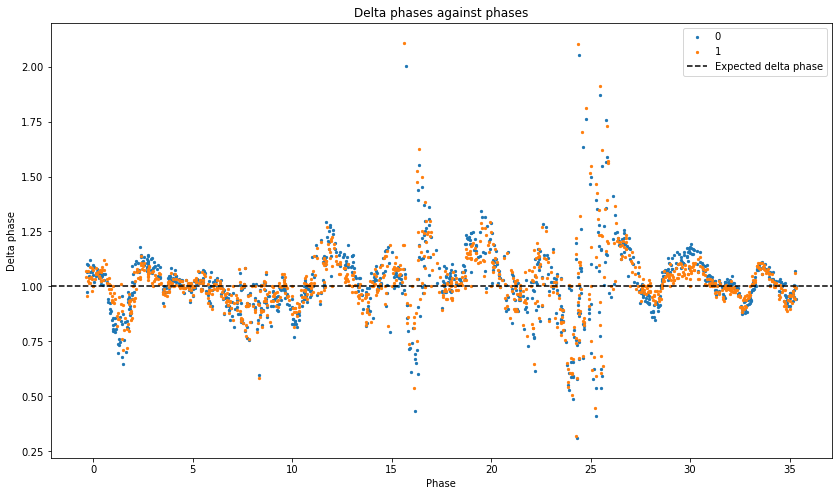

In [ ]:
bogp = BOGP([og, og_bc])
bogp.plot_delta_phases_phases()

## Plot

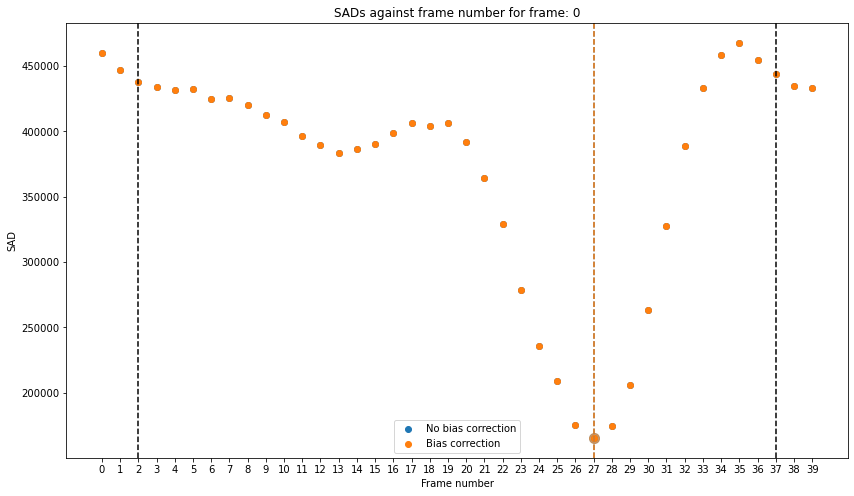

In [ ]:
bog = BOGP([og, og_bc], ["No bias correction", "Bias correction"])
bog.plot_sads(0)

# Synthetic data
# Generate

In [ ]:
v = Drawer(30, 39.1, (256, 256))
v.generate_reference_sequence()
v.generate_sequence()

In [ ]:
sog = BOG()
sog.logger.set_quiet()
sog.set_reference_period(v.reference_period)
sog.set_reference_sequence(v.reference_sequence)
sog.set_sequence(v.sequence)
sog.set_reference_framerates(v.reference_phases)
sog.run(bias_correct = False)

sog_bc = BOG()
sog_bc.logger.set_quiet()
sog_bc.set_reference_period(v.reference_period)
sog_bc.set_reference_sequence(v.reference_sequence)
sog_bc.set_sequence(v.sequence)
sog_bc.set_reference_framerates(v.reference_phases)
sog_bc.run(bias_correct = True)

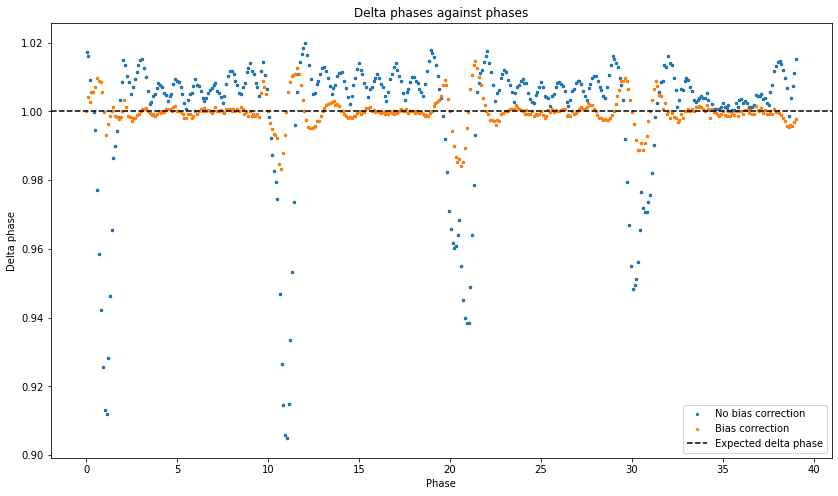

In [ ]:
sogp = BOGP([sog, sog_bc], ["No bias correction", "Bias correction"])
sogp.plot_delta_phases_phases()